## Observations and Insights 

### 1. 
#### The dataset has a nice spread in terms of giving an even amount of regiment to each mouse. There are no real statistical bias in terms of the distribution of regiments

### 2. 
#### The dataset has a nice spread for gender of the mouse, there are no significant bias between the male and female population in the data.

### 3. 
#### Based on the bar and whisker graph, the regiment Capomulin and Ramicane seems to be the more effective regiment as the tumor volume seems to be the lowest on the last time point. However, the drugs Infubinol and Ceftamin are more consistant as their outliers are closer to the lower and higher quantiles. 

Infubinol and Ceftamin should yield more consistant results and if those drugs are more effective past 45 time point, then they might be better drugs than Capomulin and Ramicane.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata.head(),study_results.head()
merge_df = pd.merge(mouse_metadata,study_results, how = 'inner', on = 'Mouse ID')

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# checkpoint
df = merge_df.copy()

In [3]:
# Checking the number of mice.
# Tutors of our classmates noted that we have a single mouse ID that has duplicated Mouse ID and Timepoint and it has different Tumor Volume for the duplications.abs
# the following will test it and find the exact ID
need_to_drop = df.loc[df.duplicated(subset = ['Mouse ID', 'Timepoint'], keep='last')]
# we will now remove the problematic mouse ID
df_989_drop = df.loc[df['Mouse ID'] != need_to_drop['Mouse ID'].unique()[0]]
df_989_drop.reset_index(drop = True)
# The number of unique Mouse ID in the dataset.
len(df_989_drop['Mouse ID'].unique())

248

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df_989_drop['Mouse ID'].unique()[:5]
# list of duplicated mouse ID or mice that lived to more than one time point

array(['k403', 's185', 'x401', 'm601', 'g791'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
df_dup = df_989_drop.loc[df.duplicated(subset = ['Mouse ID'], keep ='last')]
len(df_dup['Mouse ID'].unique())

236

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_dup_drop = df_989_drop.drop_duplicates('Mouse ID', keep = 'last')
df_dup_drop.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [7]:
# Checking the number of mice in the clean DataFrame.
len(df_dup_drop['Mouse ID'].unique())

248

## Summary Statistics

In [8]:
df = df_dup_drop.copy()

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

group_drug = df.groupby('Drug Regimen')
summary_mean = group_drug['Tumor Volume (mm3)'].mean().round(2)
summary_med = group_drug['Tumor Volume (mm3)'].median().round(2)
summary_var = group_drug['Tumor Volume (mm3)'].var().round(2)
summary_std = group_drug['Tumor Volume (mm3)'].std().round(2)
summary_sem = group_drug['Tumor Volume (mm3)'].sem().round(2)

# Assemble the resulting series into a single summary dataframe.
summary_table = pd.DataFrame()
summary_table['Mean'] = summary_mean
summary_table['Med'] = summary_med
summary_table['Var'] = summary_var
summary_table['St Dev'] = summary_std
summary_table['St Err'] = summary_sem

summary_table

,Mean,Med,Var,St Dev,St Err
Drug Regimen,,,,,
Capomulin,36.67,38.13,32.66,5.72,1.14
Ceftamin,57.75,59.85,69.98,8.37,1.67
Infubinol,58.18,60.17,74.01,8.60,1.72
Ketapril,62.81,64.49,98.92,9.95,1.99
Naftisol,61.21,63.28,106.03,10.30,2.06
Placebo,60.51,62.03,78.76,8.87,1.77
Propriva,56.49,55.59,70.82,8.42,1.72
Ramicane,36.19,36.56,32.17,5.67,1.13
Stelasyn,61.00,62.19,90.33,9.50,1.94


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = group_drug.agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
summary_table.columns = ['Mean', 'Med', 'Var', 'St Dev', 'St Err']
summary_table

,Mean,Med,Var,St Dev,St Err
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.493884,55.591622,70.822755,8.415626,1.717832
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar and Pie Charts

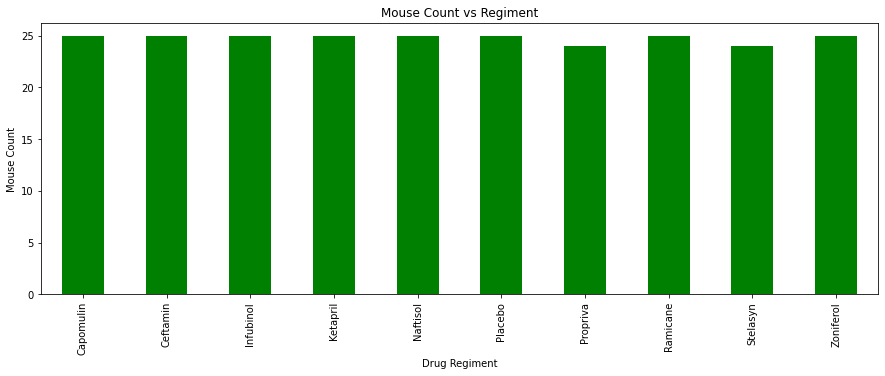

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

drug_id = df_dup_drop.groupby('Drug Regimen')['Mouse ID'].count()
drug_id.plot.bar(color = 'green', figsize=(15,5))
plt.xlabel('Drug Regiment')
plt.ylabel('Mouse Count')
plt.title('Mouse Count vs Regiment')
plt.show()

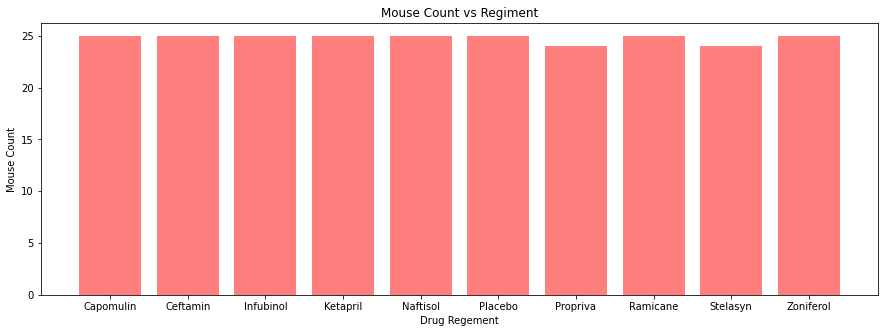

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
tick_label = drug_id.index
plt.figure(figsize=(15,5))
plt.xlabel('Drug Regement')
plt.ylabel('Mouse Count')
plt.title('Mouse Count vs Regiment')
plt.bar(tick_label,drug_id, color = 'red', alpha = .5, align = 'center')
plt.show()

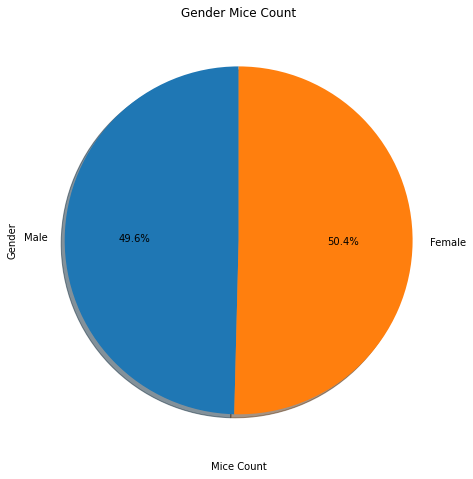

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_spread = df_dup_drop.groupby('Sex')['Mouse ID'].count()
gender_spread.plot.pie(figsize = (8,8),labels = ['Male','Female'],autopct='%1.1f%%', shadow = True, startangle = 90)
plt.xlabel('Mice Count')
plt.ylabel('Gender')
plt.title('Gender Mice Count')
plt.show()

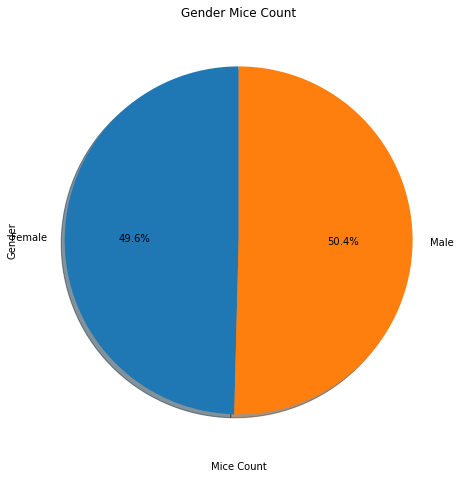

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.figure(figsize = (8,8))
plt.pie(gender_spread, labels = gender_spread.index, autopct = "%1.1f%%", shadow= True, startangle = 90)
plt.xlabel('Mice Count')
plt.ylabel('Gender')
plt.title('Gender Mice Count')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
df_max_time = pd.DataFrame(df_dup_drop.groupby('Mouse ID')['Timepoint'].max()).reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

df_time = pd.merge(df_max_time,df_dup_drop,on=['Mouse ID','Timepoint'])
df_time.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

def boxplot_drugs(drug_list):
    drug_df = pd.DataFrame()
    for drugs in drug_list:
        tumor_vol = df_time.loc[df_time['Drug Regimen'] == drugs]['Tumor Volume (mm3)']
        drug_df[drugs] = tumor_vol.reset_index(drop=True)

        # Calculate the IQR and quantitatively determine if there are any potential outliers. 

        # Locate the rows which contain mice on each drug and get the tumor volumes
        quartiles = tumor_vol.reset_index(drop=True).quantile([.25,.5,.75])
        # add subset 
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq-lowerq
        # Determine outliers using upper and lower bounds
        lower_bound = quartiles[0.25] - (1.5*iqr)
        upper_bound = quartiles[0.75] + (1.5*iqr)
        print(f"Upper/Lower Bound: {drugs}")
        print(f"Values below {lower_bound.round(2)} could be outliers.")
        print(f"Values above {upper_bound.round(2)} could be outliers.")
            
    return drug_df


drug_df = boxplot_drugs(drug_list)

Upper/Lower Bound: Capomulin
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.
Upper/Lower Bound: Ramicane
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
Upper/Lower Bound: Infubinol
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.
Upper/Lower Bound: Ceftamin
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.


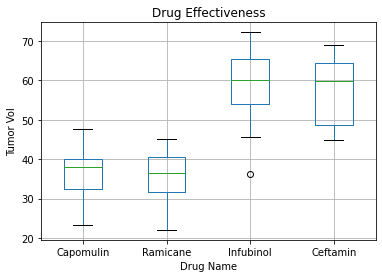

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.xlabel('Drug Name')
plt.ylabel('Tumor Vol')
plt.title('Drug Effectiveness')
boxplot = drug_df.boxplot(figsize = (12,10))

## Line and Scatter Plots

Text(0.5, 1.0, 'My Mouse "b128" Will Live')

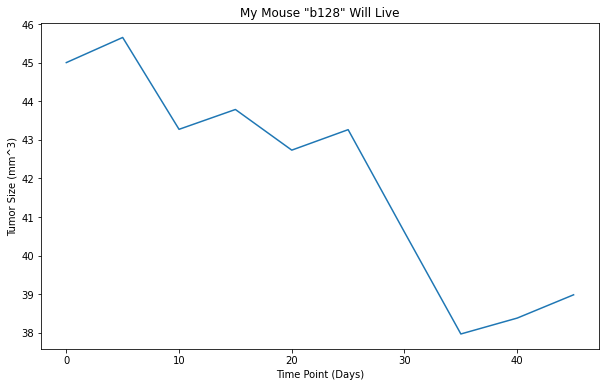

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_name = df_time.loc[df_time['Drug Regimen'] == 'Capomulin']['Mouse ID'].iloc[0]
mouse_info = merge_df.loc[merge_df['Mouse ID'] == mouse_name][['Timepoint','Tumor Volume (mm3)']]
mouse_info.index = mouse_info['Timepoint']
mouse_info['Tumor Volume (mm3)'].plot.line(figsize = (10,6))
plt.xlabel('Time Point (Days)')
plt.ylabel('Tumor Size (mm^3)')
plt.title(f'My Mouse "{mouse_name}" Will Live')

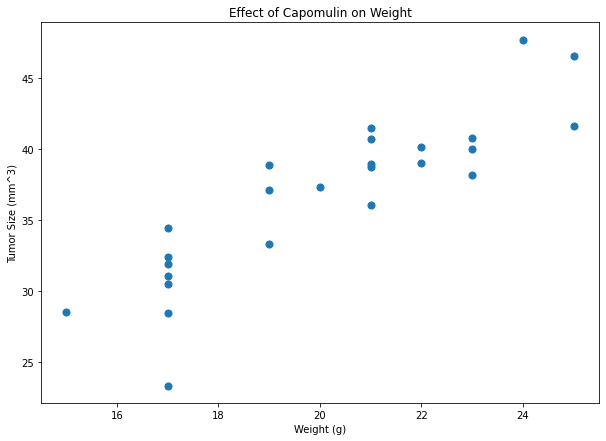

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_vol_weight = df.loc[df['Drug Regimen'] == 'Capomulin'].groupby(['Mouse ID'])[['Tumor Volume (mm3)','Weight (g)']].mean()
mouse_vol_weight.plot.scatter(x ='Weight (g)', y = 'Tumor Volume (mm3)', s = 50, figsize = (10,7))
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Size (mm^3)')
plt.title('Effect of Capomulin on Weight')
plt.show()

## Correlation and Regression

regression function: f(x) = 1.75x + 1.45


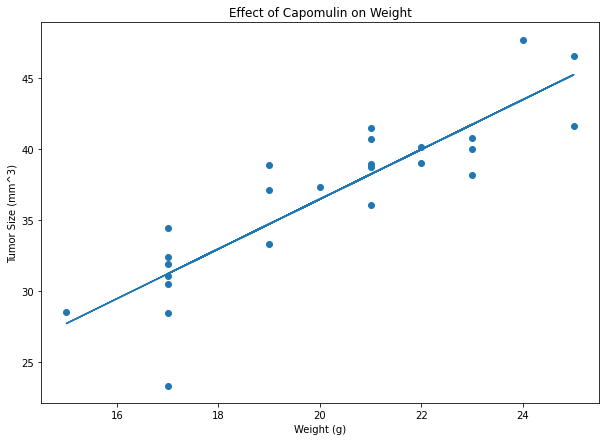

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

x_axis = mouse_vol_weight['Weight (g)']
y_axis = mouse_vol_weight['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
y_values = slope*x_axis+intercept
print(f"regression function: f(x) = {slope.round(2)}x + {intercept.round(2)}")
plt.figure(figsize=(10,7))
plt.plot(x_axis, y_values)
plt.scatter(x_axis, y_axis)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Size (mm^3)')
plt.title('Effect of Capomulin on Weight')
plt.show()